In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
trainset='/content/drive/MyDrive/Colab Notebooks/food'

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 28 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [ ]:
validation_set.class_indices

{'bánh mì': 0,
 'bánh xèo': 1,
 'bún bò': 2,
 'bún riêu': 3,
 'bún thịt nướng': 4,
 'cơm sườn': 5,
 'gỏi': 6,
 'mì quảng': 7,
 'nem': 8,
 'phở': 9}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=100,verbose=1,validation_data=validation_set)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 2.6704 - accuracy: 0.1071
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 8.8197 - accuracy: 0.1429
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 5.2156 - accuracy: 0.0714
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 2.9380 - accuracy: 0.0714
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 2.4506 - accuracy: 0.0714
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 2.3133 - accuracy: 0.1071
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 2.2926 - accuracy: 0.1071
Epoch 8/100
1/1 [==============================] - 2s 2s/step - loss: 2.2884 - accuracy: 0.1071
Epoch 9/100
1/1 [==============================] - 2s 2s/step - loss: 2.2577 - accuracy: 0.1429
Epoch 10/100
1/1 [==============================] - 2s 2s/step - loss: 2.2121 - accuracy: 0.1429
Epoch 11/100
1/1 [=====================

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 28 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [ ]:
model.save('monan.hs')

INFO:tensorflow:Assets written to: monan.hs/assets


In [ ]:
model1=load_model('monan.hs')

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img=load_img('/content/drive/MyDrive/Colab Notebooks/food/bánh mì/banhmi2.jpg',target_size=(100,100))
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=-1)

array([0])

In [ ]:
label = ['BanhMi','BanhXeo','BunBo','BunRieu','BunThitNuong','ComSuon','Goi','miquang','Nem','Pho']

BanhMi


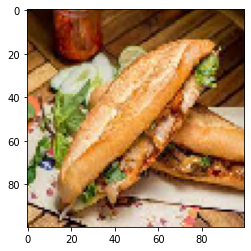

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Colab Notebooks/food/bánh mì/banhmi2.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])